In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy.cosmology import Planck18 as cosmos
from astropy import units as u
from sklearn.cluster import KMeans
h = cosmos.H0.value/100

In [2]:
quasar_lss_all = np.load('../catalogue/quasar_lss_all.npy')
random = np.load('../catalogue/random_quasar_lss_all.npy')

In [26]:
phi = np.deg2rad(quasar_lss_all['ra'])
theta = np.deg2rad(90 - quasar_lss_all['dec'])
X = np.cos(phi)*np.sin(theta)
Y = np.sin(phi)*np.sin(theta)
Z = np.cos(theta)

phi_r = np.deg2rad(random['ra'])
theta_r = np.deg2rad(90 - random['dec'])
X_r = np.cos(phi_r)*np.sin(theta_r)
Y_r = np.sin(phi_r)*np.sin(theta_r)
Z_r = np.cos(theta_r)

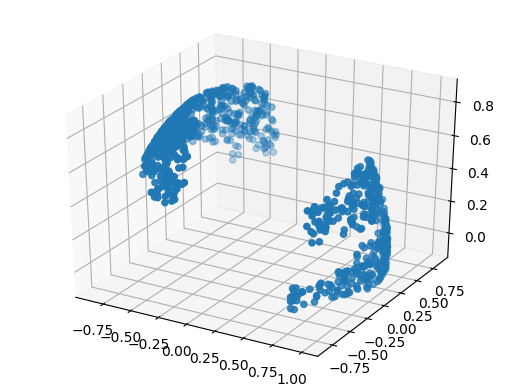

In [6]:
rand_index = np.random.randint(0, len(X), 1000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[rand_index], Y[rand_index], Z[rand_index])

In [27]:
kmeans = KMeans(n_clusters=100)
kmeans.fit(X=np.c_[X_r, Y_r, Z_r])

KMeans(n_clusters=100)

In [28]:
label_r = kmeans.labels_
label = kmeans.predict(np.c_[X, Y, Z])

In [30]:
with open('label.bin', 'wb') as f:
    np.save(f, label)
    np.save(f, label_r)